In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 'data' sheet, skip top 2 rows
df = pd.read_excel("Sales_Analysis.xlsx", sheet_name='data', skiprows=2)

# Display the actual column names (for debugging)
print("Columns:", df.columns.tolist())


Columns: ['536365', '71053', 'WHITE METAL LANTERN', 6, datetime.datetime(2010, 1, 12, 8, 26), 3.39, 17850, 'United Kingdom', 20.34, '1948-11']


In [3]:
import pandas as pd

# Step 1: Load only the 'data' sheet
df = pd.read_excel("Sales_Analysis.xlsx", sheet_name='data')

# Step 2: Drop any completely empty columns or rows (optional cleanup)
df.dropna(axis=1, how='all', inplace=True)
df.dropna(axis=0, how='all', inplace=True)

# Step 3: Assign proper column names (based on your provided structure)
df.columns = ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 
              'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Month']

# Step 4: Drop rows where Revenue or Country is missing
df = df.dropna(subset=['Revenue', 'Country'])

# Step 5: Convert Revenue to numeric if not already
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

# Step 6: Sort by Revenue (Descending)
df_sorted = df.sort_values(by='Revenue', ascending=False)

# Step 7: Show top 10 rows
df_sorted.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,168469.60,1945-01
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,NaT,1.04,12346.0,United Kingdom,77183.60,1933-10
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-10-06 15:28:00,649.50,15098.0,United Kingdom,38970.00,1941-05
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-07-12 15:08:00,13541.33,NaN,United Kingdom,13541.33,1900-01
299982,A563185,B,Adjust bad debt,1,2011-12-08 14:50:00,11062.06,NaN,United Kingdom,11062.06,1900-01
173382,551697,POST,POSTAGE,1,2011-03-05 13:46:00,8142.75,16029.0,United Kingdom,8142.75,1943-11
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,NaT,5.06,17450.0,United Kingdom,7144.72,1947-10
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,NaT,2.10,15749.0,United Kingdom,6539.40,1943-02
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-11-01 12:55:00,2.10,15749.0,United Kingdom,6539.40,1943-02
421601,573003,23084,RABBIT NIGHT LIGHT,2400,NaT,2.08,14646.0,Netherlands,4992.00,1940-02


Grouping Total Revenue by Country (Bar Chart)

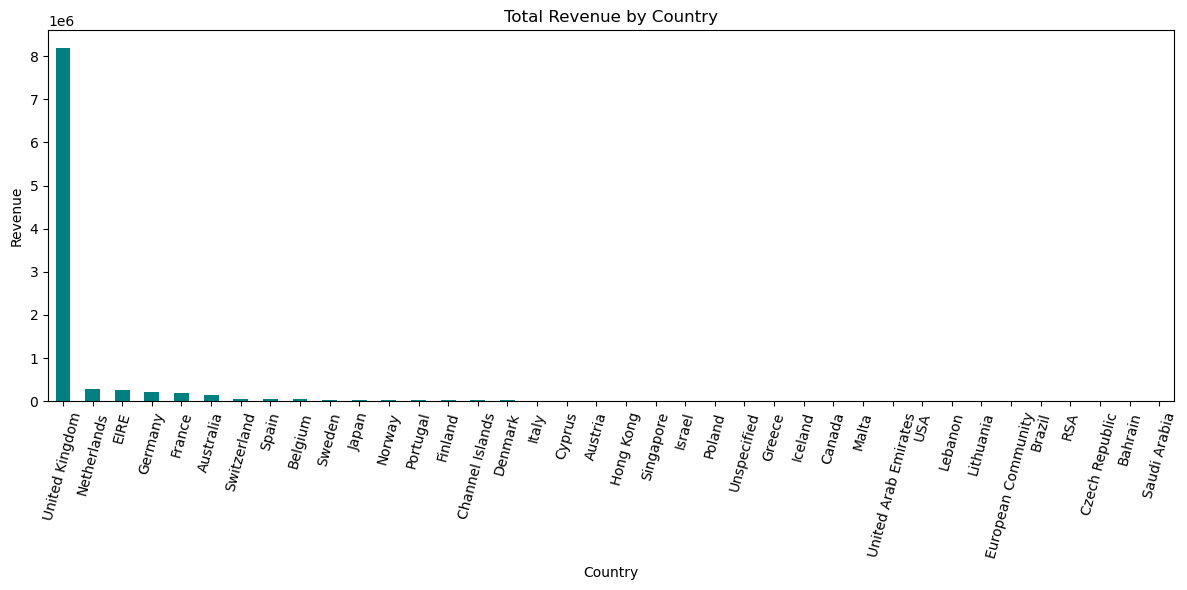

In [4]:
import matplotlib.pyplot as plt

# Group total revenue by country
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
country_revenue.plot(kind='bar', color='teal')
plt.title('Total Revenue by Country')
plt.ylabel('Revenue')
plt.xlabel('Country')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


Monthly Revenue Trend (Line Plot)

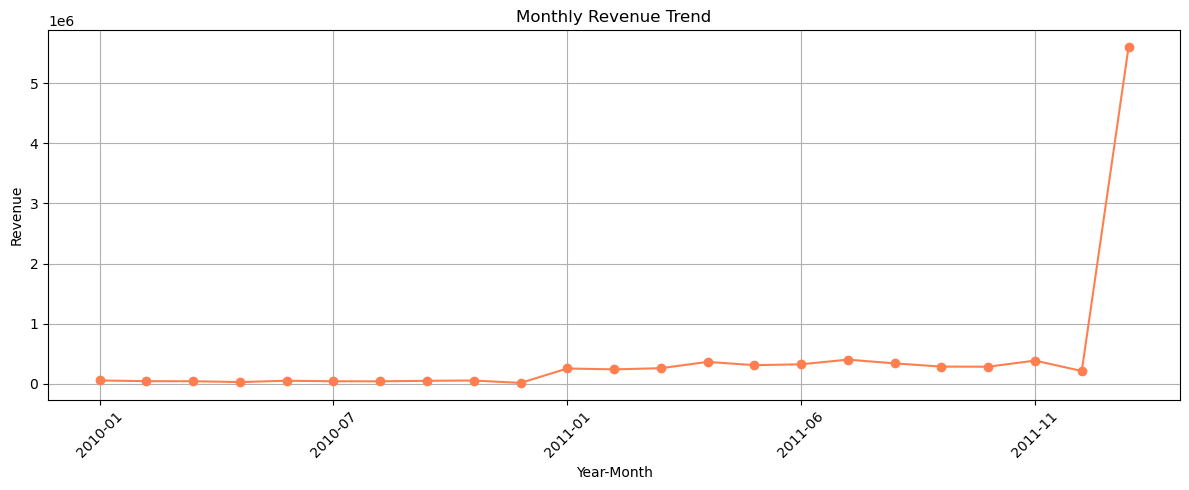

In [5]:
# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extract Year-Month as a new column
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)

# Group by Year-Month
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum()

# Plot
plt.figure(figsize=(12,5))
monthly_revenue.plot(kind='line', marker='o', color='coral')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Countries by Revenue (Pie Chart)

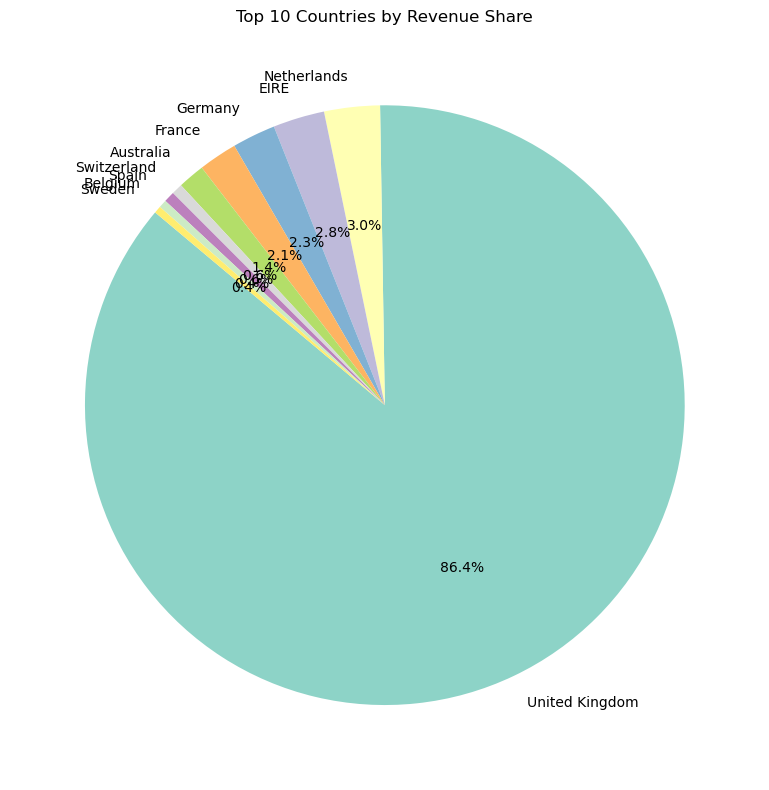

In [6]:
top_countries = country_revenue.head(10)

# Pie chart
plt.figure(figsize=(8,8))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.ylabel('')
plt.title('Top 10 Countries by Revenue Share')
plt.tight_layout()
plt.show()


Top 10 Customers by Revenue

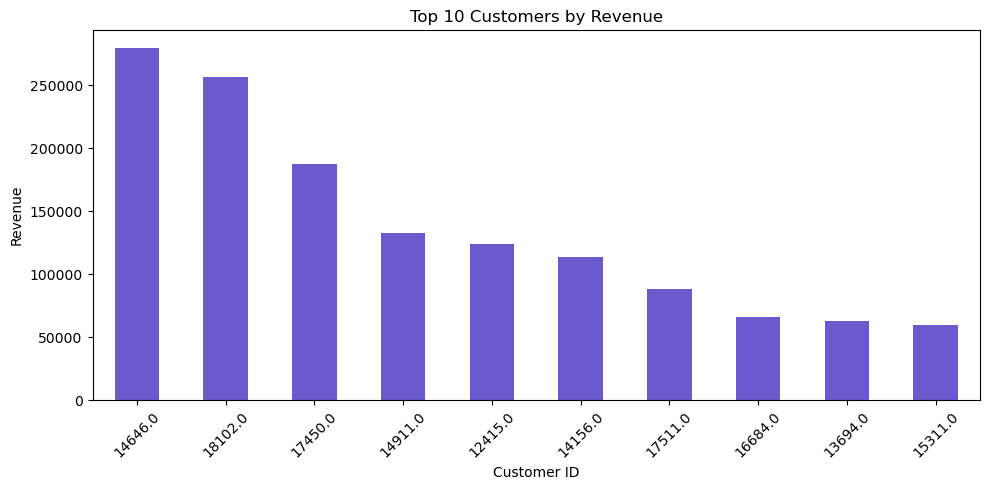

In [7]:
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_customers.plot(kind='bar', color='slateblue')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Products by Total Revenue

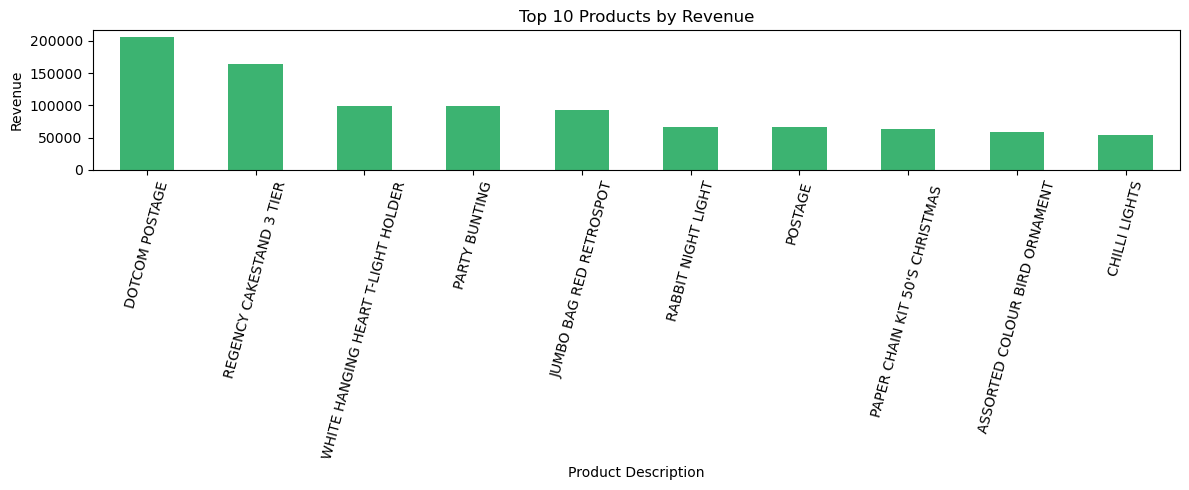

In [8]:
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
top_products.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Revenue')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


Most Sold Products (by Quantity)

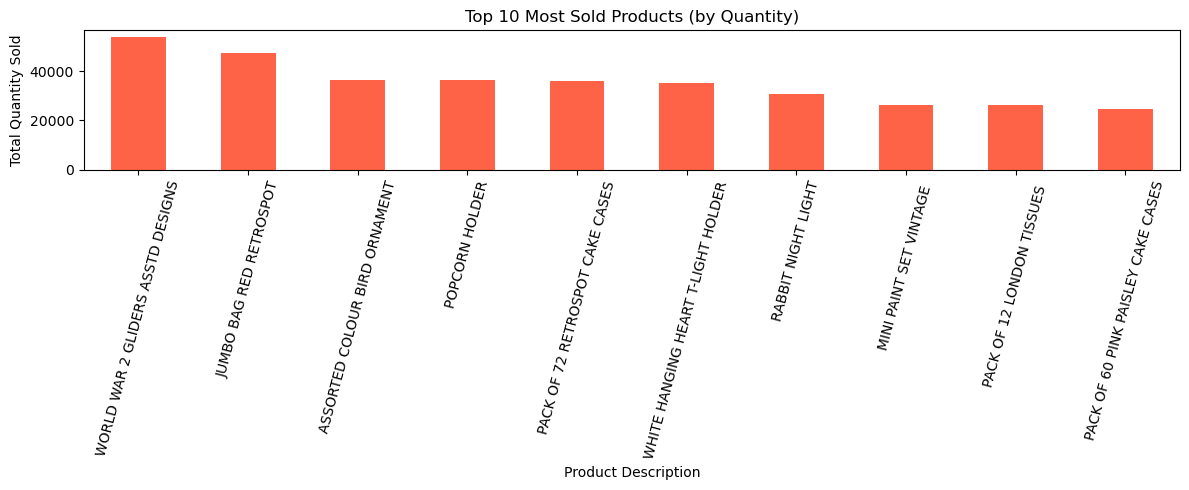

In [9]:
top_sold_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
top_sold_products.plot(kind='bar', color='tomato')
plt.title('Top 10 Most Sold Products (by Quantity)')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# Load Excel
df = pd.read_excel("Sales_Analysis.xlsx", sheet_name="data")

# Convert to proper datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

# Format to MySQL style
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Save cleaned CSV
df.to_csv("cleaned_sales_data.csv", index=False)
